## Image Recognition using CNNs

#### I have used keras to perform Image recognition using CNNs. In order to make the most of our few training examples, I have augmented them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better. In Keras this is done via the keras.preprocessing.image.ImageDataGenerator class. I have experimented with 3 different CNN models which are explained below.

In [180]:
from matplotlib import pyplot
from PIL import Image
from pylab import *
import os
import numpy as np
import cv2

In [206]:
path = 'yalefaces/'
vector=[]
y_train = []
for image in os.listdir(path):
    try:
        im = array(Image.open(path + image))
        resized = cv2.resize(im, (80,61),\
                             interpolation =\
                             cv2.INTER_AREA)
        vector.append(resized)
    except Exception as e:
        continue

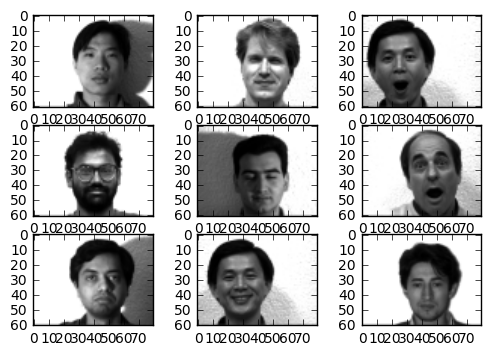

In [207]:
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    
    pyplot.imshow(np.asarray(vector[i]),\
                  cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

## Data Augmentation (2f)

We perform data augmentation using ImageDataGenerator function in keras. Here we augment images by seemingly darkening and lightening each image.

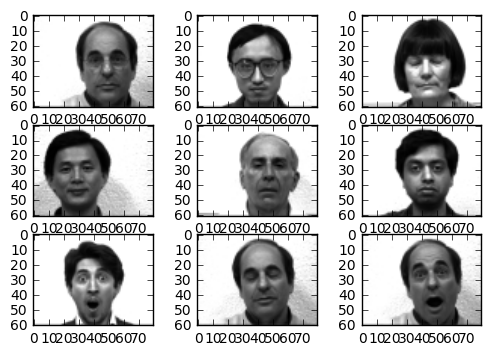

In [208]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
vector = np.asarray(vector).reshape\
(np.asarray(vector).shape[0],1,80,61)
X_train = vector
X_train = X_train.astype('float32')
datagen = ImageDataGenerator\
(featurewise_center=True, featurewise_std_normalization=True)
for X_batch in datagen.flow(X_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(61, 80)\
                      , cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

### Here we augment images by rotating, horizontal shifting, vertical shifting, shearing on an angle, zooming, horizontally flipping them. The augmented images are stored in preview directory. 20 more images are created for each image.

In [29]:
from keras.preprocessing.image import ImageDataGenerator,\
array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
path = 'yalefaces/'
for image in os.listdir(path):
    try:
        img = load_img(path+image)  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
        subject = image.split(".")[0]
        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir='preview',\
                                  save_prefix=subject,\
                                  save_format='jpeg'):
            i += 1
            if i > 20:
                break  # otherwise the generator would loop indefinitely
    except:
        continue

## Face Recognition with CNNs (2g)

The model constructed here consists of a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers. On top of it we stick two fully-connected layers. We end the model with a single unit and a sigmoid activation to classify images. To go with it we will also use the categorical_crossentropy loss to train our model.

A dropout rate of 0.5 is used after the first dense layer.

## First Model

In [197]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(1, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 148, 148)      320       
_________________________________________________________________
activation_76 (Activation)   (None, 32, 148, 148)      0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 72, 72)        9248      
_________________________________________________________________
activation_77 (Activation)   (None, 32, 72, 72)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 32, 36, 36)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 34, 34)        18496     
__________

In [198]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Second Model

The second model is same as the first one but we use a stride of (2,2) on the convolution layers.

In [209]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), strides=(2, 2),\
                  input_shape=(1, 150, 150)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), strides=(2, 2)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), strides=(2, 2)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 74, 74)        320       
_________________________________________________________________
activation_81 (Activation)   (None, 32, 74, 74)        0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 32, 37, 37)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 18, 18)        9248      
_________________________________________________________________
activation_82 (Activation)   (None, 32, 18, 18)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 32, 9, 9)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 64, 4, 4)          18496     
__________

In [189]:
model1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15))
model1.add(Activation('sigmoid'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Third Model

Here we use a kernel of size (2, 2) which specifies the width and height of the 2D convolution window. The optimizer used here is Adam Optimizer.

In [193]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model3 = Sequential()
model3.add(Conv2D(32, (2, 2), input_shape=(1, 150, 150)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 149, 149)      160       
_________________________________________________________________
activation_71 (Activation)   (None, 32, 149, 149)      0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 73, 73)        4128      
_________________________________________________________________
activation_72 (Activation)   (None, 32, 73, 73)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 32, 36, 36)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 64, 35, 35)        8256      
__________

In [194]:
model3.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(15))
model3.add(Activation('sigmoid'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Splitting Data into train and test

The data is divided into two folders train and test keeping in mind that both have the same number of subjects. 

In [184]:
import os
import shutil
path = 'yalefaces/'

image_list = []
for image in os.listdir(path):
    try:
        label = image.split(".")[0]
        if label != "Icon\r" and label != "Readme"\
        and image != ".DS_Store":
            image_list.append(image)
    except:
        continue
from sklearn.model_selection import train_test_split
train, test = train_test_split(image_list, test_size=0.2, random_state=14)
print "No of samples in training set: ", len(train)
print "No of samples in testing set: ", len(test)

unique_train = set([x.split(".")[0] for x in train])
print "Unique subjects in train data: ", len(unique_train)
unique_test = set([x.split(".")[0] for x in test])
print "Unique subjects in test data: ", len(unique_test)

No of samples in training set:  132
No of samples in testing set:  33
Unique subjects in train data:  15
Unique subjects in test data:  15


###  Data is copied from yalefaces directory to data/train and data/test folders. To run this, we need to create folders data/train and data/test.



In [52]:
for image in train:
    label = image.split(".")[0]
    if not os.path.exists("data/train/" + label):
        os.makedirs("data/train/" + label)
    full_file_name = os.path.join(path, image)
    shutil.copy(full_file_name, "data/train/" + label)
    os.rename("data/train/" + label + "/" + image,\
              "data/train/" + label + "/" + image + ".png")

for image in test:
    label = image.split(".")[0]
    if not os.path.exists("data/test/" + label):
        os.makedirs("data/test/" + label)
    full_file_name = os.path.join(path, image)
    shutil.copy(full_file_name, "data/test/" + label)
    os.rename("data/test/" + label + "/" + image,\
              "data/test/" + label + "/" + image + ".png")

## Data Augmentation

### I used .flow_from_directory() to generate batches of image data (and their labels) directly from our .pngs in their respective folders (train and test directory)

In [210]:
batch_size = 16
train_data_dir = 'data/train'

# augmentation configuration for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# augmentation configuration for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale') 

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale')

Found 132 images belonging to 15 classes.
Found 33 images belonging to 15 classes.


### These generators are now used to train the 1st model

In [199]:
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train)//batch_size,
        epochs=50,
        validation_data=test_generator,
       validation_steps=len(train)//batch_size)
model.save_weights('first_try.h5') 
model.save('my_model.h5')

Epoch 1/50
8/8 [==============================] - 25s - loss: 2.7715 - acc: 0.0445 - val_loss: 2.7143 - val_acc: 0.0306
Epoch 2/50
8/8 [==============================] - 25s - loss: 2.7196 - acc: 0.0711 - val_loss: 2.7090 - val_acc: 0.1224
Epoch 3/50
8/8 [==============================] - 23s - loss: 2.6989 - acc: 0.0999 - val_loss: 2.6949 - val_acc: 0.1224
Epoch 4/50
8/8 [==============================] - 21s - loss: 2.7174 - acc: 0.1315 - val_loss: 2.6650 - val_acc: 0.1735
Epoch 5/50
8/8 [==============================] - 20s - loss: 2.5998 - acc: 0.1264 - val_loss: 2.5932 - val_acc: 0.2143
Epoch 6/50
8/8 [==============================] - 20s - loss: 2.4684 - acc: 0.1659 - val_loss: 2.7482 - val_acc: 0.0612
Epoch 7/50
8/8 [==============================] - 25s - loss: 2.4593 - acc: 0.2109 - val_loss: 2.4643 - val_acc: 0.3367
Epoch 8/50
8/8 [==============================] - 26s - loss: 2.2442 - acc: 0.3448 - val_loss: 2.2601 - val_acc: 0.3061
Epoch 9/50
8/8 [========================

## Training the 2nd model

In [190]:
model1.fit_generator(
        train_generator,
        steps_per_epoch=len(train)//batch_size,
        epochs=50,
        validation_data=test_generator,
       validation_steps=len(train)//batch_size)
model1.save_weights('second_try.h5') 
model1.save('my_model2.h5')

Epoch 1/50
8/8 [==============================] - 6s - loss: 2.7054 - acc: 0.0553 - val_loss: 2.7355 - val_acc: 0.0361
Epoch 2/50
8/8 [==============================] - 4s - loss: 2.7191 - acc: 0.0711 - val_loss: 2.7255 - val_acc: 0.0204
Epoch 3/50
8/8 [==============================] - 4s - loss: 2.7012 - acc: 0.0553 - val_loss: 2.7359 - val_acc: 0.0306
Epoch 4/50
8/8 [==============================] - 4s - loss: 2.7052 - acc: 0.0869 - val_loss: 2.7404 - val_acc: 0.0306
Epoch 5/50
8/8 [==============================] - 4s - loss: 2.6878 - acc: 0.0761 - val_loss: 2.7548 - val_acc: 0.0306
Epoch 6/50
8/8 [==============================] - 4s - loss: 2.7044 - acc: 0.0547 - val_loss: 2.7367 - val_acc: 0.0306
Epoch 7/50
8/8 [==============================] - 4s - loss: 2.6996 - acc: 0.0711 - val_loss: 2.7344 - val_acc: 0.0306
Epoch 8/50
8/8 [==============================] - 4s - loss: 2.6825 - acc: 0.1365 - val_loss: 2.7548 - val_acc: 0.0306
Epoch 9/50
8/8 [==============================] 

## Training the 3rd  Model

In [195]:
model3.fit_generator(
        train_generator,
        steps_per_epoch=len(train)//batch_size,
        epochs=50,
        validation_data=test_generator,
       validation_steps=len(train)//batch_size)
model3.save_weights('third_try.h5') 
model3.save('my_model3.h5')

Epoch 1/50
8/8 [==============================] - 21s - loss: 2.7342 - acc: 0.0474 - val_loss: 2.7269 - val_acc: 0.0306
Epoch 2/50
8/8 [==============================] - 21s - loss: 2.7008 - acc: 0.0781 - val_loss: 2.7145 - val_acc: 0.0918
Epoch 3/50
8/8 [==============================] - 20s - loss: 2.6648 - acc: 0.1106 - val_loss: 2.7253 - val_acc: 0.0918
Epoch 4/50
8/8 [==============================] - 20s - loss: 2.6607 - acc: 0.1106 - val_loss: 2.6761 - val_acc: 0.1224
Epoch 5/50
8/8 [==============================] - 19s - loss: 2.5689 - acc: 0.1473 - val_loss: 2.6920 - val_acc: 0.0918
Epoch 6/50
8/8 [==============================] - 19s - loss: 2.5174 - acc: 0.1027 - val_loss: 2.5796 - val_acc: 0.1531
Epoch 7/50
8/8 [==============================] - 19s - loss: 2.4919 - acc: 0.1501 - val_loss: 2.4582 - val_acc: 0.1531
Epoch 8/50
8/8 [==============================] - 22s - loss: 2.3479 - acc: 0.1818 - val_loss: 2.4239 - val_acc: 0.2143
Epoch 9/50
8/8 [========================

# Accuracy on the models

### 1st Model

Testing Accuracy - 0.9388
Training Accuracy - 0.7766


### 2nd Model 
Testing Accuracy - 0.7653
Training Accuracy - 0.4950

### 3rd Model
Testing Accuracy - 0.8163
Training Accuracy - 0.7313

#### The 1st Model performs the best in which the kernel size is (3,3), the optimizer is rmsprop.


# Predicting class to which an Image belongs according to 1st Model

We predicted the image "subject01.glasses" using our model. The highest probabilty we get is for class = 1 which means this image belongs to subject01. The prediction for this image is correct.

In [205]:
im = array(Image.open('yalefaces/subject01.glasses'))
resized = cv2.resize(im, (150,150), interpolation = cv2.INTER_AREA)
resized = np.reshape(resized, (1, 150, 150))
img = np.expand_dims(resized, axis=0)
model.predict(img, batch_size=16, verbose=0)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]], dtype=float32)